## Import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import joblib

## Dataset

In [16]:
iris = pd.read_csv('data/iris.csv')

In [17]:
print("Dataset preview :")
print(iris.head())

Dataset preview :
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [18]:
print("Summary of Dataset :")
print(iris.describe())

Summary of Dataset :
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [19]:
print("Missing values :")
print(iris.isnull().sum())

Missing values :
sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64


## Preprocessing

In [20]:
encoder = LabelEncoder()
iris['variety_encoded'] = encoder.fit_transform(iris['variety'])

In [21]:
print("Encoded classes :")
print(encoder.classes_)

Encoded classes :
['Setosa' 'Versicolor' 'Virginica']


In [22]:
# Dimensions
print(f"Dataset shape : {iris.shape}")

Dataset shape : (150, 6)


In [23]:
# Grouped statistics
print("Grouped Mean by variety :")
print(iris.groupby('variety').mean())

Grouped Mean by variety :
            sepal.length  sepal.width  petal.length  petal.width  \
variety                                                            
Setosa             5.006        3.428         1.462        0.246   
Versicolor         5.936        2.770         4.260        1.326   
Virginica          6.588        2.974         5.552        2.026   

            variety_encoded  
variety                      
Setosa                  0.0  
Versicolor              1.0  
Virginica               2.0  


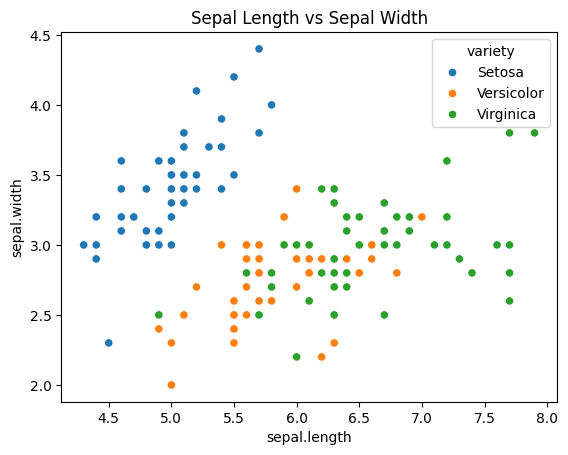

In [26]:
#Visualisation

sns.scatterplot(x='sepal.length', y='sepal.width', hue='variety', data=iris)
plt.title("Sepal Length vs Sepal Width")
plt.show()

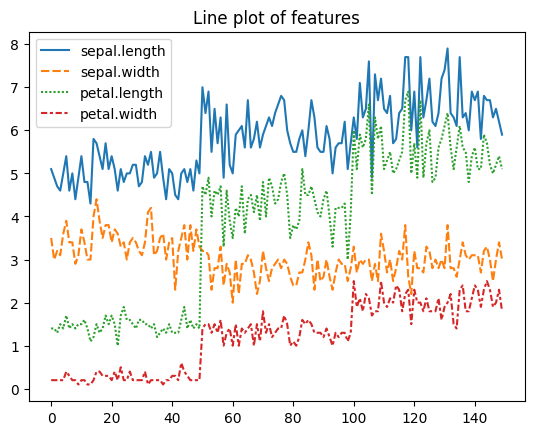

In [27]:
sns.lineplot(data=iris.drop(['variety', 'variety_encoded'], axis=1))
plt.title("Line plot of features")
plt.show()

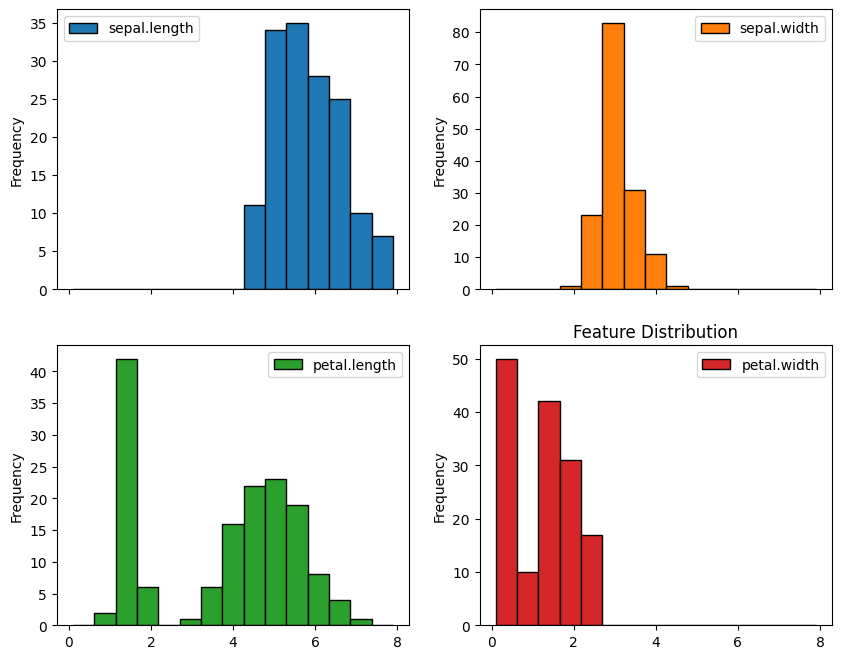

In [29]:
iris.drop(['variety', 'variety_encoded'], axis=1).plot.hist(subplots=True, layout=(2,2), figsize=(10,8), bins=15, edgecolor='black')
plt.title("Feature Distribution")
plt.show()

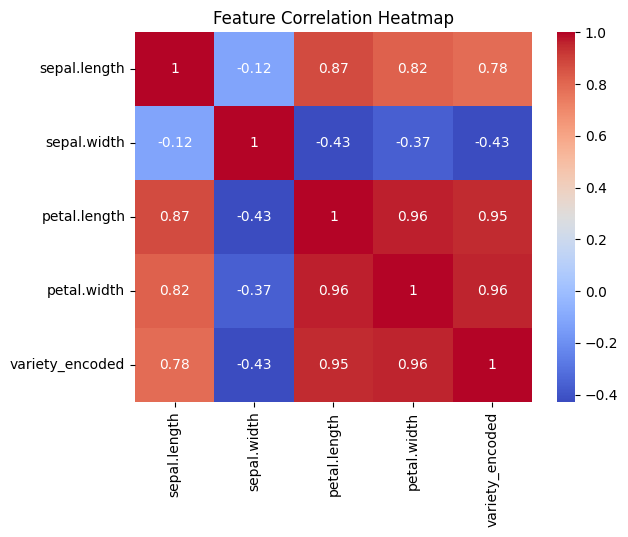

In [30]:
# Correlations
iris_num = iris.drop(['variety'], axis=1)

sns.heatmap(iris_num.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## Training

In [31]:
X = iris.drop(['variety', 'variety_encoded'], axis=1)
y = iris['variety_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

print(f"Training set shape : {X_train.shape}")
print(f"Test set shape : {X_test.shape}")

Training set shape : (90, 4)
Test set shape : (60, 4)


In [33]:
svm = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Classification Report :")
print(metrics.classification_report(y_test, y_pred_svm))
print(f"SVM Accuracy : {metrics.accuracy_score(y_test, y_pred_svm):.4f}")

SVM Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        20
           2       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

SVM Accuracy : 0.9667


## Save

In [34]:
joblib.dump(svm, 'model.pkl')
print("Model saved !")

Model saved !
